<a href="https://colab.research.google.com/github/Felix-Leonel/Codigos-Hate-Speech/blob/main/Codigo_dataset_OFFCOMBR_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install transformers
!pip uninstall tokenizers
!pip install tokenizers

import torch
from transformers import BertModel, BertForMaskedLM, PreTrainedTokenizer
from tokenizers import BertWordPieceTokenizer
import logging

!pip install wget

import wget
import os

import pandas as pd

# USA O MODULO TOKENIZER DO HUGGINFACE
from tokenizers import (ByteLevelBPETokenizer,
                            SentencePieceBPETokenizer,
                            BertWordPieceTokenizer)

from sklearn.model_selection import train_test_split

from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#IMPORTA O BERT E O OTIMIZADOR ADAM
from transformers import BertForSequenceClassification, AdamW, BertConfig, BertModel

#ESTA CLASSE FARÁ O AGENDAMENTO
from transformers import get_linear_schedule_with_warmup

import numpy as np
import time
import datetime

import random

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score  
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix


     |████████████████████████████████| 2.5MB 7.9MB/s 
     |████████████████████████████████| 901kB 46.8MB/s 
     |████████████████████████████████| 3.3MB 46.7MB/s 
Uninstalling tokenizers-0.10.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/tokenizers-0.10.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tokenizers/*
Proceed (y/n)? y
  Successfully uninstalled tokenizers-0.10.3
  Using cached https://files.pythonhosted.org/packages/d4/e2/df3543e8ffdab68f5acc73f613de9c2b155ac47f162e725dcac87c521c11/tokenizers-0.10.3-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl
  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9675 sha256=09e09626fb532f6e8355fd627f6469d6afb87f5f7108499c1c949500a60dfffa
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


There are 1 GPU(s) available.
We will use the GPU: Tesla T4
<class 'numpy.ndarray'>
1033
nao a pizza anunciada de anistia do caixa  sim a divulgacao da lista da odebrecht
Tokenizer(vocabulary_size=29794, model=BertWordPiece, unk_token=[UNK], sep_token=[SEP], cls_token=[CLS], pad_token=[PAD], mask_token=[MASK], clean_text=True, handle_chinese_chars=True, strip_accents=False, lowercase=False, wordpieces_prefix=##)
1033
1033
Encoding(num_tokens=128, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])
['[CLS]', 'votar', '##am', 'no', 'pe', '##za', '##o', 'agora', 'tom', '##em', 'no', 'c', '##za', '##o', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]',

Some weights of the model checkpoint at bert-portuguese were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (29794, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

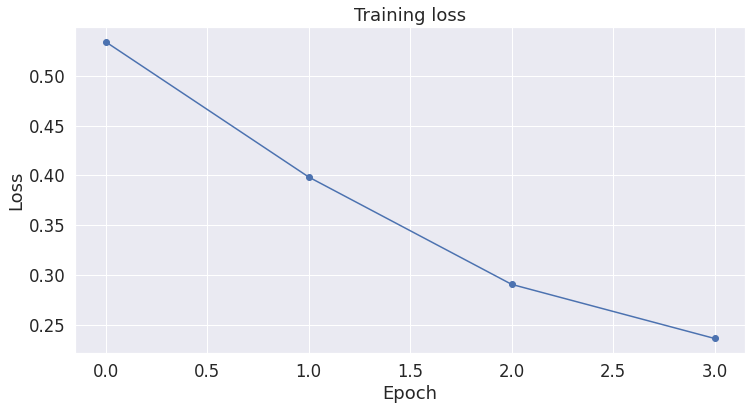

1033
1033
1033
Accuracy: 0.91
Accuracia:  0.8905852417302799
Balanced Accuracy: 0.8104575163398693
F1 Score: 0.8867329572015095
Recall: 0.8905852417302799
Precision:  0.886611891909031
True Negative:  292
False Positive:  14
False Negative:  29
True Positive:  58


In [ ]:


"""#Configura o ambiente para usar GPU (CUDA)"""

if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

"""OPCIONAL: Pode ativar um debbug para entender melhor o que acontece"""
logging.basicConfig(level=logging.INFO)

"""Carrega um modelo de Tokenizer pré-treinado (neste caso o Multilanguage para trabalhar com português)
#Download do Dataset de treinamento
Fazer o download do CoLA Dataset ( The Corpus of Linguistic Acceptability (CoLA)). Um dataset em inglês para classificação simples: se a senteça está gramaticalmente correta ou não (parte do GLUE Benchmark)
Instala o Wget para fazer o download
"""

"""#Pre-processando o Dataset
Na pasta, existem duas pastas. Precisamos usar os dados brutos (raw) para que possamos criar os token usando o BertTokenizer. Não podemos usar as setenças tokenizadas porque o processo utilizado na criação desses tokens foi diferente do usado pelo Bert.<br>
Iremos utilizar o pandas para manipular as entradas.
"""
############################################################################################
df = pd.read_csv('/content/drive/MyDrive/Python/OFFCOMBR_CSV/OffComBR3.csv', delimiter=',')
df['@@class'].replace('yes', 1, inplace=True)
df['@@class'].replace('no', 0, inplace=True)
#def augment_text(df,samples=629,pr=0.2):
#    aug_w2v.aug_p=pr
#    new_text=[]
#    
#    ##selecting the minority class samples
#    df_n=df[df.target==1].reset_index(drop=True)
#
#    ## data augmentation loop
#    for i in tqdm(np.random.randint(0,len(df_n),samples)):
#        
#            text = df_n.iloc[i]['document']
#            augmented_text = aug_w2v.augment(text)
#            new_text.append(augmented_text)
#    
#    
#    ## dataframe
#    new=pd.DataFrame({'text':new_text,'target':1})
#    df=shuffle(df.append(new).reset_index(drop=True))
#    return df
#Retirando 'RT', '@' e # do arquivo
#df['document'] = df['document'].replace('#\w*', '', regex=True)
#df['document'] = df['document'].replace('RT @\w*: ', '', regex=True)
#df['document'] = df['document'].replace('@\w* ', '', regex=True)
########################################################################
"""Podemos criar dos arrays (Numpy Array) para armazenar as setenças e os labels. Também vamos deixar todos os textos em letras minúsculas:"""
sentencas = df['document'].values
labels = df['@@class'].values

# MOSTRANDO O TIPO DE DADOS (Numpy Array)
print(type(sentencas))


#MODIFICANDO AS SETENÇAS PARA TODAS AS LETRAS MINÚSCULAS
print(len(sentencas))
for x in range (len(sentencas)):
  sentencas[x] = sentencas[x].lower()
print(sentencas[7])

"""#Formatando a Entrada e Criando os Tokens e IDS
Agora chegou a hora de criarmos os tokens para que depois eles possam ser mapeados para os index do vocabulário.<Br>
Para isso, utilizaremos o BertTokenizer, que já importamos anteriormente. Utilizaremos a versão 'bert-based-unscased' (inglês).<br>
Antes disso, no entanto, precisamos formatar a entrada para respeitar os requisitos de entrada do Bert, que são os seguintes:
1.   Adicionar tokens especiais no início e no fim de cada sentença ([CLS] para o início de uma sentença de classificação / [SEP] para indicar o fim de uma sentença.
![alt text](http://www.mccormickml.com/assets/BERT/CLS_token_500x606.png)
2. Precisamos fazer o Pad e Truncate para que todas as senteças tenham o mesmo tamanho de entrada (máximo de 512 tokens).
3. Diferenciar o que são tokens reais dos token de padding, criando um "attention mask". 
![alt text](http://www.mccormickml.com/assets/BERT/padding_and_mask.png)
#Entendendo o Tokenizer<br>
O modelo do Google tem um vocabulário de 30.000 tokens com aprox 768 dimensões cada (embeedings).<br>
Os Tokens podem representar palavras completas (mas não todas) <br>
Os Tokens podem representar sub-palavras de palavras desconhecidas (as subwords são iniciadas com ##. Reparem que a palavra Diogo não existe no vocabulário. Ela é quebrada em duas subwords: Dio + ##go. Atenção: O token go é diferente do ##go) <oov><br>
Os Tokens podem representar caracteres e marcações especiais:<br>
[PAD]: Padding<br>
[UNK]:Unknow<br>
[CLS]: Classificação<br>
[SEP]: Separação das sentenças<br>
[MASK]: Máscara para a palavra<br>
"""

# FAZ O DOWNLOAD DO VOCABULÁRIO
if not os.path.exists('vocab.txt'):
  wget.download("https://neuralmind-ai.s3.us-east-2.amazonaws.com/nlp/bert-base-portuguese-cased/vocab.txt")

# FAZ O DOWNLOAD DO PRE-TREINADO EM PT-BT
if not os.path.exists('bert-base-portuguese-cased_pytorch_checkpoint.zip'):
  wget.download("https://neuralmind-ai.s3.us-east-2.amazonaws.com/nlp/bert-base-portuguese-cased/bert-base-portuguese-cased_pytorch_checkpoint.zip")
  !unzip bert-base-portuguese-cased_pytorch_checkpoint.zip -d bert-portuguese

# CRIA O TOKENIZER A PARTIR DE UM VOCABULÁRIO
# LOWERCASE = FALSE (NÃO IRÁ CONVERTER AS ENTRADAS PARA LOWERCASE. MANTEM O ORGINIAL)
# STRIP ACCENTS = FALSE (MANTEM OS ACENTOS)
tokenizer = BertWordPieceTokenizer("vocab.txt", lowercase=False, strip_accents=False)

# MOSTRA AS INFORMAÇÕES DO TONENIZER
print(tokenizer)

# PERMITE O TRUNCATION E O PADDING
tokenizer.enable_truncation(max_length=240)
tokenizer.enable_padding()


# TOKENINZA EM BATCH TODAS AS SENTENÇAS
# TEM QUE USAR .TOLIST PARA CONVERTER POR LISTA. SENTENCAS É UM ARRAY NUMPY
output = tokenizer.encode_batch(sentencas.tolist())

# O TOKENIZER RETORAR UMA LISTA DE OBJETOS DO TIPO TOKENIZER
# PRECISAMOS PEGAR OS ATRIBUTOS IDS E MASKS E ADICIONAR PARA LISTAS
# OS OBJETOS TEM O ATRIBUTO IDS(IDS), TOKENS (TOKENS) E attention_mask
# PRECISAMOS FAXER O FOR PARA PEGAR CADA UM E DEPOIS CRIAR A LISTA
ids=[x.ids for x in output]
attention_mask = [x.attention_mask for x in output]

print(len(ids))
print(len(attention_mask))

# PRINTS EXEMPLO DE SAIDA DA PRIMEIRA LINHA
print(output[0])
print(output[0].tokens)

"""#Dividindo o Dataset em Treinamento e Validação
Vamos usar a ferramenta do ScikitLearn para nos ajudar neste processo. Vamos dividir o dataset em 80% para treinamento e 20% para a validação
"""

#USAR O MESMO RANDON_STATE PARA NAO TROCAR OS INPUTS DE SUAS MÁSCARAS
train_input, validation_input, train_labels, validation_labels = train_test_split(ids, labels, random_state=2018, test_size=0.2)
train_mask, validation_mask, _, _ = train_test_split(attention_mask, labels, random_state=2018, test_size=0.2)

#COMPARANDO A PRIMEIRA LINHA DE TREINAMENTO COM A MASCARA
print(train_input[0])
print(train_mask[0])

"""#Criando os tensores (Pytorch Data Type)
Os modelos do PyTorch esperam de entrada o tipo tensor, então precisamos converter o nosso dataset de Numpy Array para tensores.
"""

train_input_tensor = torch.tensor(train_input)
validation_input_tensor = torch.tensor(validation_input)

train_labels_tensor = torch.tensor(train_labels)
validation_labels_tensor = torch.tensor(validation_labels)

train_mask_tensor = torch.tensor(train_mask)
validation_mask_tensor= torch.tensor(validation_mask)

"""Uma ação adicional é usar o torch DataLoade, que cria um "iterator". Diferente de um for, o iterador não sobe todo o dataset não precisa ser carregado todo na memória (ajuda no treinamento)"""

#É PRECISO ESPECIFICAR O TAMANHO DO BATCH, PARA O BERT OS AUTORES RECOMENDAM 16 OU 32
batch_size = 32

#CRIA OS DATALOADERS PARA O CONJUNTO DE TREINAMENTO
train_data = TensorDataset(train_input_tensor, train_mask_tensor, train_labels_tensor)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)


#CRIA OS DATALOADRES PARA O CONJUNTO DE VALIDAÇÃO
validation_data = TensorDataset(validation_input_tensor, validation_mask_tensor, validation_labels_tensor)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

"""#Treinando o modelo
O Bert oferece um modelo pré-treinando a qual só precisamos fazer fine-tune para a tarefas que desejamos. O huggingface disponibiza não só o modelo pré-treinado mas também interfaces para nossas tarefas específicas. Algumas disponíveis são:
*   BertMode
*   BertForMaskedLM
*   BertForNextSentencePrediction
*   BertForSequenceClassification (vamos usar este)
*   BertForTokenClassification
*   BertForQuestionAnsering
O BerForSequenceClassification basicamente é a implementação do modelo Bert com a adição de uma camada de FFN para classificação. Lembre-se que o huggieface disponibilizou diversas versões de modelo pré-treinanda (base, large, multilanugage). Você pode escolher a que for melhor para o seu propósito. Neste caso, vamos utilizar a versão multilingual por contemplar o português.
"""

#CRIA O MODELO BERT PRETREINADO COM UMA CAMADA DE CLASSIFICAÇÃO NO TOPO
model = BertForSequenceClassification.from_pretrained(
    'bert-portuguese', 
    num_labels = 2, # NUMERO DE CLASSES (NO CASO BINÁRIA: ACEITÁVEL OU NÃO. PODE TER MAIS PARA MULTICLASSE)  
    output_attentions = True, # SE O MODELO DEVE EXPORTAR OS PESOS DAS ATENÇÕES
    output_hidden_states = True, # SE O MODELO DEVE EXPORTAR OS HIDDEN STATES (PODE SER INTERESSANTE PARA ESTUDAR EMBEDDINGS)
)

#DIZ AO MODELO PARA USAR GPU
model.cuda()

"""**CURIOSDIADE.** 
Uma curiosidade disponibilizada em (https://mccormickml.com/2019/07/22/BERT-fine-tuning/) <br>
É possível mostrar os parâmetro do modelo:
<br>
*   A camada de embeddings
*   A primeira das 12 camadas de transformers
*   A camada de saída (output)
A execução do trecho abaixo é optativa.
"""

# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

"""**Otimizador**
Carregamos o modelo, agora precisamos criar o Otimizador Adam. Os autores recomendam os seguintres valores:
*   Batch Size: 16, 32 (Lembre-se que usamos 32 no Dataloader)
*   Learning Rate (Adam):  5e-5, 3e-5, 2e-5 (vamos usar 2e-5)
*   Numero de épocas (Quantas vezes TODO o dataset é treinado):  2,3,4 (utilizaremos 4):
"""

#ADAMW É A CLASSE DO HUGGINGFACE
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

"""**Learning Rate Scheduler**
Em redes neurais é útil diminuir a taxa de aprendizado (learning rate) conforme as épocas vão aumentando para que possamos evitar que o modelo entre em um estado "caótico" com taxas grandes ou o "falso míninmo" com taxas pequenas. A ideia é ir ajustando conforme as épocas vão passando.
"""

epochs = 4 #QUANTIDADE DE ÉPOCAS

#PARA CALCULAR A QUANTIDADE DE PASSOS É A QTD DE BATCHS * ÉPOCAS
total_steps = epochs * len(train_dataloader) 

#CRIANDO O AGENDADOR
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, #VALOR PADRÃO
                                            num_training_steps = total_steps)

"""**Loop de Treinamento**
Não é só chamar alguma função para treinar o modelo. Precisamos criar um loop que se repita a quantidade de épocas especificadas executando as atividades abaixo. A cada passagem, também faremos uma avaliação do modelo:
Loop de treinamento
*   Desempacotar os dados de entrada e os labels
*   Carregar os dados para a GPU
*   Limpar os gradientes calculados na passagem anterior (no pytorch os gradientes são acumulados por padrão. pode ser útil para RNN, mas não no caso de transformers.
* Forward Pass (Passar os dados pela rede)
* Backward Pass (backpropagation)
* Pedir para a rede atualizar os parâmetros (optimizer.step())
* Monitar as variáveis para saber o progresso
Loop de avaliação
* Desempacotar os dados de entrada e os labels
* Carregar os dados para a GPU
* Forward Pass (Passar os dados pela rede)
* Computar a perda na nossa validação e monitorar as variáveis para saber o progresso.
**Antes, vamos criar duas funções de ajuda. Uma para calcular a acurácia do modelo e outra para formatar o horário**:
"""
# FUNÇÃO  QUE CALCULA A ACURÁCIA DO MODELO (PREDIÇÕES vs LABELS)
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

# FUNÇÃO QUE FORMATA O HORÁRIO
def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

"""**AGORA VEM O LOOP DE TREINAMENTO :)**"""

# PRIMEIRO PRECISAMOS GARANTIR A REPRODUTIBILIDADE
# USANDO OS SEEDS DO PYTORCH, GARANTIMOS QUE OS VALORES SERÃO INICIADOS DA MESMA FORMA
# VAMOS SETAR O MESMO VALOR EM DIFERENTES LUGARES

seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# CRIANDO UMA LISTA QUE IRÁ ARMZENAR LOSS AO FIM DE CADA ÉPOCA
loss_values = []

# CRIANDO O LOOP DAS ÉPOCAS
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # MEDIR QUANTO TEMPO UMA ÉPOCA LEVA
    t0 = time.time()

    # RESETANDO O LOSS PARA ESTA ÉPOCA
    total_loss = 0

    #COLOCANDO O MODELO NO MODO DE TREINAMENTO
    #ESSE COMANDO NÃO CHAMA O TREINAMENTO, APENAS AVISA O MODELO PARA FAZER AJUSTES DE DROPOUTS
    model.train()
    device = torch.device("cuda")

    # UM LOOP PARA CADA BATCH  DENTRO DA ÉPOCA
    for step, batch in enumerate(train_dataloader):
        # PRECISAMOS DESPEMPACOTAR O BATCH E CARREGAR NA GPU
        # BATCH CONTEM TRÊS TENSORES
        #   [0]: ID DE INPUT
        #   [1]: ATTENTION MASKS
        #   [2]: LABELS 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        #PRECISAMOS LIMPAR O GRADIENTE ANTES DE BACKPROP
        #PYTORCH NAO FAZ ISSO AUTOMÁTICO
        model.zero_grad()

        #AGORA VAMOS FAZER UMA PASSAGEM (FORWARD PASS)
        #O RESULTADO SERÁ LOSS (NÃO SERÁ A PREDIÇÃO PQ PASSAMOS OS LABELS)
        outputs = model(b_input_ids, 
                    token_type_ids=None, #USADO QUANDO É NEXT SEQUENCE
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        #O MODELO RETORNA UMA TUPLA. 
        #VAMOS PEGAR O VALOR DA TUPLA
        loss = outputs[0]
        hidden_state = outputs[2]
        

        # VAMOS ARMAZENAR O HIDDEN STATE E ATENÇÃO TB
      


        #VAMOS ACUMULAR O VALOR NO TOTAL DE LOSS DA ÉPOCA
        # .item() RETORNA UM VALOR PYTHON DE UM TENSOR
        total_loss += loss.item()

        #AGORA VAMOS FAZER O BACKWARD PARA CALCULAR O GRADIENTE
        loss.backward()

        # PASSO NECESSÁRIO
        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # O OTIMIZADOR VAI ATUALIZAR OS PARAMETROS COM BASE NO GRADIENTE
        optimizer.step()

        # ATUALIZANDO O LEARNING RATE
        scheduler.step()

    # APOS TODOS OS BATCH DE UMA EPOCA
    # CACLULA AVERAGE LOSS COM BASE NO TREINAMENTO (TAMANHO DO DATASET)
    
    avg_train_loss = total_loss / len(train_dataloader)

    #ARMAZENA O LOSS NA LISTA (PARA DEPOIS SER PLOTADO NO GRAFICO)
    loss_values.append(avg_train_loss)

    # DENTRO DE CADA ÉPOCA TAMBÉM VAMOS RODAR UMA AVALIAÇÃO
    print("Running Validation...")
    t0 = time.time()

    # COLOCANDO O MODELO NO MODO DE AVALIAÇÃO (SAINDO DO MODULO DE TREINAMENTO)
    model.eval()

    # CRIANDO VARIÁVEIS DE MONITORAMENTO
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # LOOP PARA AVALIAR CADA BATCH DE TREINAMENTO
    for batch in validation_dataloader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # PEDE AO MODELO PARA NAO COMPUTAR GRADIENTES (É VALIDAÇÃO, NÃO TREINAMENTO)
        with torch.no_grad():  
          # FORWARD PASS PARA CALCULAR OS LOGITS DA PREDIÇÃO
          outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
          
        # O RESULTADO DO MODELO AGORA NÃO SERÁ LOSS
        # SERÁ 'LOGITS', VALOR DE SAIDA ANTES DE UMA FUNÇÃO DE ATIVAÇÃO (SOFTMAX POR EXEMPLO)
        # COMO É UMA CLASSIFICAÇÃO BINÁRIA, SÓ OS LOGITS SERVEM
        # DEPENDENDO DO MODELO SERIA NECESSÁRIO UM SOFTMAX
        logits = outputs[0]

        # MOVER OS LOGITS E OS LABELS PARA A CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        #CALCULAR ACURÁCIA CHAMANDO A FUNÇÃO QUE CRIAMOS ANTERIORMENTE
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        # ACUMULAR O TOTAL DA ACURÁCIA
        eval_accuracy += tmp_eval_accuracy

        # TRACKEAR O NUMERO DE BATCHS
        nb_eval_steps +=1

    # EXIBINDO DADOS FINAIS
    print("  Acurácia: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Tempo de Validação: {:}".format(format_time(time.time() - t0)))

#FIM DAS EPOCAS
print("FIM DO TREINAMENTO")

"""** Mostrando o gráfico LOSS por época **"""

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o')

# Label the plot.
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

"""#Executando e Testando o modelo
Agora que o modelo está treinado, podemos executá-lo. Nesta seção vamos fazer alguns testes. O primeiro ponto é preparar os dados (assim como fizemos na fase de treinamento), mas desta vez não precisamos dos labels.
"""

# FUNÇÃO QUE VALIDA O MODELO
def Validar_Modelo(prediction_dataloader, batch_size):
  #ARMAZENAR RESULTADOS
  resultado_predicoes = []
  resultados_esperados = []
  falsos_positivos = []
  falsos_negativos = []
  verdadeiros_positivos = []
  verdadeiros_negativos =[]
  nb_eval_steps = 0
  eval_accuracy = 0
  tmp_eval_accuracy = 0
  for batch in prediction_dataloader:
    b_input_ids = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    b_labels = batch[2].to(device)
    # PEDE AO MODELO PARA NAO COMPUTAR GRADIENTES (É VALIDAÇÃO, NÃO TREINAMENTO)
    with torch.no_grad():  
      # FORWARD PASS PARA CALCULAR OS LOGITS DA PREDIÇÃO
      outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)       
    # O RESULTADO DO MODELO AGORA NÃO SERÁ LOSS
    # SERÁ 'LOGITS', VALOR DE SAIDA ANTES DE UMA FUNÇÃO DE ATIVAÇÃO (SOFTMAX POR EXEMPLO)
    # COMO É UMA CLASSIFICAÇÃO BINÁRIA, SÓ OS LOGITS SERVEM
    # DEPENDENDO DO MODELO SERIA NECESSÁRIO UM SOFTMAX
    # TAMBÉM É POSSIVEL PEGAR A ATENÇÃO E OS HIDDEN STATES
    logits = outputs[0]
    attention=outputs[-1]
    all_hidden_state = outputs[-2]
    
    # MOVER OS LOGITS E OS LABELS PARA A CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    reconstruct_input_id = b_input_ids.to('cpu').numpy()

    # LOOP PARA VISUALIZAR CADA SETENÇA
    for logit, label, inputs, att in zip(logits, label_ids, reconstruct_input_id, attention):
      resultado_predicoes.append(np.argmax(logit))
      resultados_esperados.append(label)
      # LOOP PARA IDENTIFICAR FALSOS POSITIVIOS, FALSOS NEGATIVOS e CORRETOS
      if (label != np.argmax(logit)):
        if (label == 1 and np.argmax(logit) == 0):
          falsos_negativos.append(inputs)
        elif(label == 0 and np.argmax(logit) == 1):
          falsos_positivos.append(inputs)
      else:
        if (label == 1 and np.argmax(logit) == 1):
          verdadeiros_positivos.append(inputs)
        elif (label == 0 and np.argmax(logit) == 0):
          verdadeiros_negativos.append(inputs)  

    #CALCULAR ACURÁCIA CHAMANDO A FUNÇÃO QUE CRIAMOS ANTERIORMENTE
    tmp_eval_accuracy = flat_accuracy(logits, label_ids)
          
    # ACUMULAR O TOTAL DA ACURÁCIA
    eval_accuracy += tmp_eval_accuracy

    # TRACKEAR O NUMERO DE BATCHS
    nb_eval_steps +=1    
    #wait = input("PRESS ENTER TO CONTINUE.")
    

  # RELATÓRIO FINAL
  print("Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))

  print("Accuracia: ", accuracy_score(resultados_esperados, resultado_predicoes))
  
  print("Balanced Accuracy:", balanced_accuracy_score(resultados_esperados, resultado_predicoes))

  print("F1 Score:", f1_score(resultados_esperados, resultado_predicoes, average='weighted'))

  print("Recall:", recall_score(resultados_esperados, resultado_predicoes, average='weighted'))

  print("Precision: ", precision_score(resultados_esperados, resultado_predicoes, average='weighted'))

  tn, fp, fn, tp = confusion_matrix(resultados_esperados, resultado_predicoes).ravel()
  print ("True Negative: ", tn)
  print ("False Positive: ", fp)
  print ("False Negative: ", fn)
  print ("True Positive: ", tp)

"""#Tratando os dados para chamar a validação"""
df = pd.read_csv('/content/drive/MyDrive/Python/OFFCOMBR_CSV/OffComBR3.csv', delimiter=',')

df['@@class'].replace('yes', 1, inplace=True)
df['@@class'].replace('no', 0, inplace=True)

sentencas = df['document'].values
labels = df['@@class'].values

tokenizer.enable_truncation(max_length=100)
tokenizer.enable_padding()

# TOKENINZA EM BATCH TODAS AS SENTENÇAS
# TEM QUE USAR .TOLIST PARA CONVERTER POR LISTA. SENTENCAS É UM ARRAY NUMPY
output = tokenizer.encode_batch(sentencas.tolist())


# O TOKENIZER RETORAR UMA LISTA DE OBJETOS DO TIPO TOKENIZER
# PRECISAMOS PEGAR OS ATRIBUTOS IDS E MASKS E ADICIONAR PARA LISTAS
# OS OBJETOS TEM O ATRIBUTO IDS(IDS), TOKENS (TOKENS) E attention_mask
# PRECISAMOS FAXER O FOR PARA PEGAR CADA UM E DEPOIS CRIAR A LISTA
ids=[x.ids for x in output]
tokens = [x.tokens for x in output]
attention_mask = [x.attention_mask for x in output]


# AGORA PRECISAMOS CONVERTER DE NUMPY PARA TENSOR
prediction_input = torch.tensor(ids)
prediction_mask = torch.tensor(attention_mask)
prediction_labels = torch.tensor(labels)

# GARANTINDO QUE TODOS OS CAMPOS TEM O MESMO TAMANHO
print (prediction_input.size(0))
print (prediction_mask.size(0))
print (prediction_labels.size(0))

# DEFININDO O TAMANHO DO BATCH
batch_size = 32  

# CRIANDO O DATALOADER
prediction_data = TensorDataset(prediction_input, prediction_mask, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Validar_Modelo(prediction_dataloader, batch_size)

